This project aims to create a logistic regression model to accurately predict customer churn in order to inform business decisions for the Telecom business.

In [1]:
# Import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Read in csv file
df = pd.read_csv('C:/Users/rajan/Documents/PortfolioProject/Datasets/telecom_churn.csv')

In [3]:
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [4]:
# Check for null values
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [5]:
# Check variable data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
# Get descriptive statistics of data
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
df['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [9]:
df.groupby('Churn')['CustServCalls'].mean()

Churn
0    1.449825
1    2.229814
Name: CustServCalls, dtype: float64

In [10]:
df.groupby('Churn')['OverageFee'].mean()

Churn
0     9.954618
1    10.623085
Name: OverageFee, dtype: float64

In [11]:
df.groupby('Churn')['MonthlyCharge'].mean()

Churn
0    55.816246
1    59.190062
Name: MonthlyCharge, dtype: float64

In [12]:
df.groupby('Churn')['RoamMins'].mean()

Churn
0    10.158877
1    10.700000
Name: RoamMins, dtype: float64

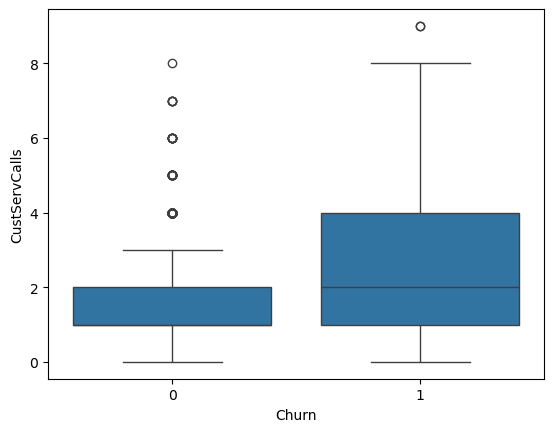

In [13]:
# Create boxplots and for outliers in data
sns.boxplot(x='Churn', y='CustServCalls', data=df);

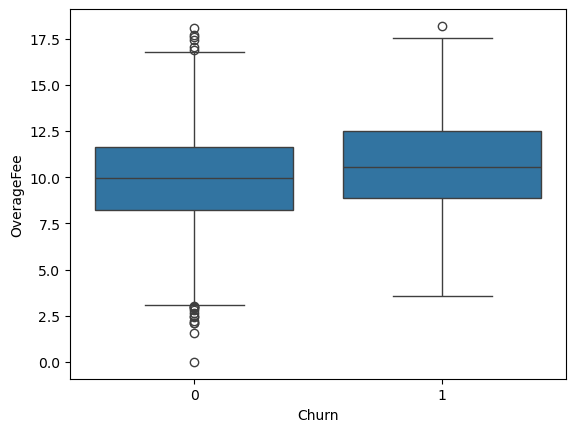

In [14]:
sns.boxplot(x='Churn', y='OverageFee', data=df);

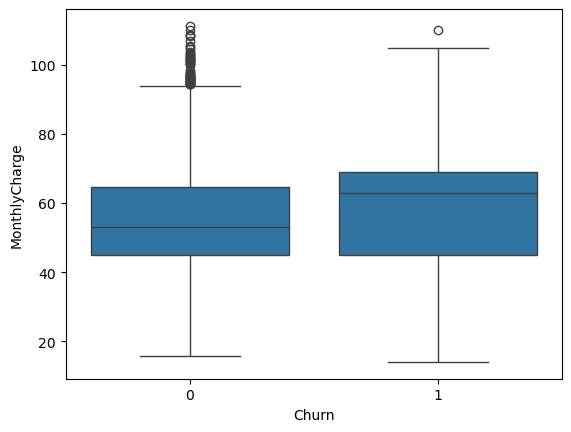

In [15]:
sns.boxplot(x='Churn', y='MonthlyCharge', data=df);

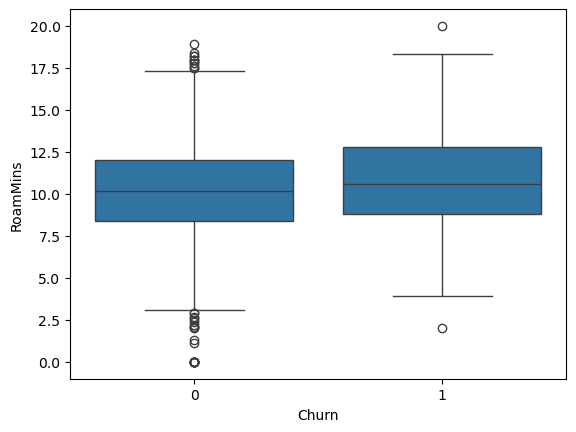

In [16]:
sns.boxplot(x='Churn', y='RoamMins', data=df);

In [17]:
# Create correlation matrix and heatmap
df.corr(method='pearson')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


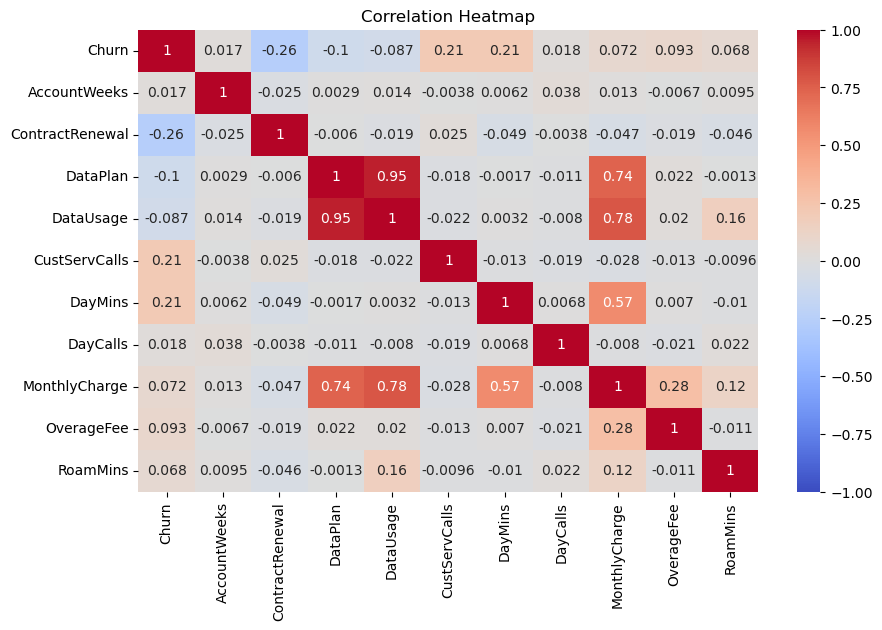

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

In [19]:
# Drop variables from data that have a low correlation with Churn
df1 = df.drop(columns=['AccountWeeks', 'DataPlan', 'DataUsage', 'MonthlyCharge', 'OverageFee', 'RoamMins'])
df1.head()

,Churn,ContractRenewal,CustServCalls,DayMins,DayCalls
0,0,1,1,265.1,110
1,0,1,1,161.6,123
2,0,1,0,243.4,114
3,0,0,2,299.4,71
4,0,0,3,166.7,113


In [20]:
# Train data
X = df1.drop('Churn', axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
model = LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400, penalty=None)

In [22]:
# Check model assumptions
pd.Series(model.coef_[0], index=X.columns)

ContractRenewal   -2.000987
CustServCalls      0.492773
DayMins            0.011143
DayCalls           0.000263
dtype: float64

In [23]:
model.intercept_

array([-3.15464317])

In [24]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.97720221, 0.02279779],
       [0.87630512, 0.12369488],
       [0.62852069, 0.37147931],
       ...,
       [0.97507644, 0.02492356],
       [0.89510585, 0.10489415],
       [0.97821553, 0.02178447]])

In [25]:
logit_data = X_train.copy()

logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

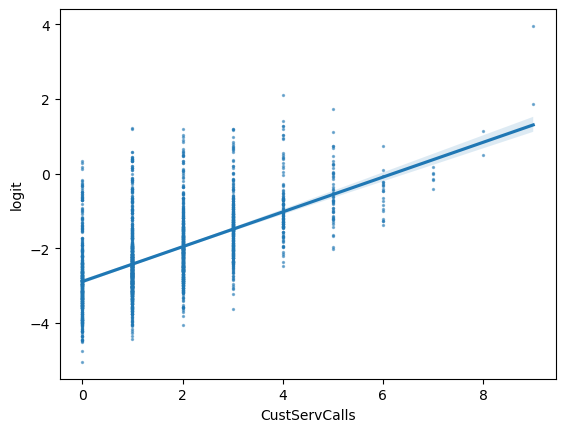

In [26]:
sns.regplot(x='CustServCalls', y='logit', data=logit_data, scatter_kws={'s':2, 'alpha':0.5});

In [27]:
y_preds = model.predict(X_test)

In [28]:
model.score(X_test, y_test)

0.8489208633093526

In [29]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_preds)

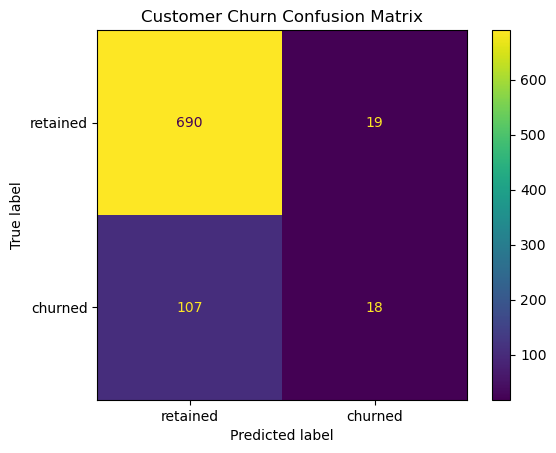

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'churned'],
                             )
disp.plot()
disp.ax_.set_title('Customer Churn Confusion Matrix');

In [31]:
# Create Classification Report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.87      0.97      0.92       709
     churned       0.49      0.14      0.22       125

    accuracy                           0.85       834
   macro avg       0.68      0.56      0.57       834
weighted avg       0.81      0.85      0.81       834



Based on the high recall score of the logistic regression model it can predict true positives (retained customers) relatively accurately. However, the model does poorly in predicting the amount of true negatives (customers churned) that will occur. To increase the predicting power of the model, new features could be created or more data could be collected that have a stronger correlation to customer churn. This could be done by expanding on whether or not the customer calls were specifically complaints in regards to the service being provided. A machine learning model could also be created to have a more accurate model, but that is beyond the scope of this project. The model created is insufficient in predicting customer churn, but could be used for future exploratory efforts.